In [28]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras_visualizer import visualizer

In [11]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 20s 2us/step


In [25]:
# Create Model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


C:\Users\ariya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
)

history = model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9962 - loss: 0.0190 - val_accuracy: 0.9893 - val_loss: 0.0944
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9969 - loss: 0.0139 - val_accuracy: 0.9897 - val_loss: 0.0834
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9963 - loss: 0.0171 - val_accuracy: 0.9856 - val_loss: 0.1421
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9961 - loss: 0.0177 - val_accuracy: 0.9864 - val_loss: 0.1519
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9958 - loss: 0.0195 - val_accuracy: 0.9861 - val_loss: 0.1767
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9971 - loss: 0.0156 - val_accuracy: 0.9875 - val_loss: 0.1505
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9971 - loss: 0.0166 - val_accuracy: 0.9872 - val_loss: 0.1455
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9968 - loss: 0

In [ ]:
model.save('OCR_MODEL.h5')

In [29]:
visualizer(model=model, file_format='png', file_name='OCR_RNN')

In [66]:
#Predict Function
def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(28, 28, 1), color_mode='grayscale')
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    return tf.argmax(predictions[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted number: 7


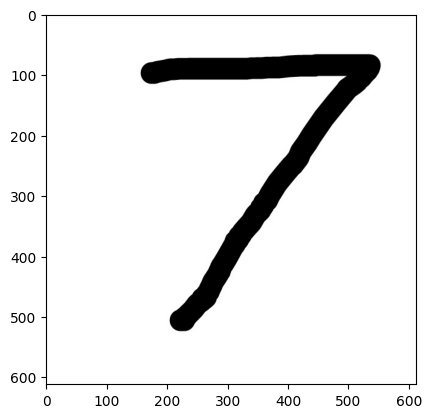

In [77]:
# Predicting number from test image


img = plt.imread('tests/z.jpg')
plt.imshow(img, cmap='gray')
print(f'Predicted number: {predict_image("tests/z.jpg")}')